In [4]:
#LSTM-based autoencoder
import pandas as pd
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model

Using TensorFlow backend.


In [51]:
import tensorflow as tf

In [ ]:
#through this exercise, it is clear, there are a few lessons:
#(1) it is not easy to get the dimensions right easily;
#(2) to process sequence data, I will need to the following:
#    map sequence (characters) to integers
#    pad the sequences
#    one hot encoding (convert to categorical) 

In [1]:
!ls /Users/hbi16859/Desktop/explore/AI_Pilot/challenges/challenge_code/

get_clean_kd_data.py             get_smiles_from_inchikey.nb.html
get_smiles_from_inchikey.Rmd     inchikey_inchi_smiles.tab


In [2]:
!head -n5 /Users/hbi16859/Desktop/explore/AI_Pilot/challenges/challenge_code/inchikey_inchi_smiles.tab

inchikey	inchi	smiles
WUEKQBWOLUXRLC-IUCAKERBSA-N	InChI=1S/C12H19N3O5/c1-7(16)14-8(4-5-10(17)18)12(20)15-6-2-3-9(15)11(13)19/h8-9H,2-6H2,1H3,(H2,13,19)(H,14,16)(H,17,18)/t8-,9-/m0/s1	CC(=N[C@@H](CCC(=O)O)C(=O)N1CCC[C@H]1C(=N)O)O
WUEUSIZSEGWDFF-QRBPUMSVSA-N	InChI=1S/C46H60N6O8/c1-28(2)22-35(49-43(56)38(52-45(59)60-46(5,6)7)26-32-27-47-34-21-15-14-20-33(32)34)40(53)50-37(24-30-16-10-8-11-17-30)42(55)48-36(23-29(3)4)41(54)51-39(44(57)58)25-31-18-12-9-13-19-31/h8-21,27-29,35-39,47H,22-26H2,1-7H3,(H,48,55)(H,49,56)(H,50,53)(H,51,54)(H,52,59)(H,57,58)/t35-,36-,37+,38+,39+/m1/s1	CC(C)C[C@H](C(=N[C@@H](Cc1ccccc1)C(=N[C@H](CC(C)C)C(=N[C@@H](Cc1ccccc1)C(=O)O)O)O)O)N=C([C@H](Cc1c[nH]c2ccccc12)N=C(O)OC(C)(C)C)O
WUGANDSUVKXMEC-UHFFFAOYSA-N	InChI=1S/C18H14BrNO5S2/c19-11-5-7-12(8-6-11)27(24,25)20-15-9-16(26-10-17(21)22)18(23)14-4-2-1-3-13(14)15/h1-9,20,23H,10H2,(H,21,22)	c1ccc2c(c1)c(cc(c2O)SCC(=O)O)NS(=O)(=O)c1ccc(cc1)Br
WUGDAJPNWXMGLH-CQJMVLFOSA-N	InChI=1S/C34H44N7O12PS/c35-27(43)16-25-31(47)38-23(

In [25]:
import numpy as np

In [6]:
df=pd.read_csv("/Users/hbi16859/Desktop/explore/AI_Pilot/challenges/challenge_code/inchikey_inchi_smiles.tab",sep="\t",header=0)

In [28]:
smiles=df["smiles"].dropna().apply(lambda x: [i for i in x])

In [33]:
array1=smiles.tolist()

In [38]:
len(array1)

1794

In [39]:
flat_list=[]
for sublist in array1:
    for item in sublist:
        flat_list.append(item)

In [42]:
chars = sorted(list(set(flat_list)))

In [43]:
chars

['#',
 '(',
 ')',
 '+',
 '-',
 '.',
 '/',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '=',
 '@',
 'B',
 'C',
 'F',
 'H',
 'I',
 'K',
 'L',
 'N',
 'O',
 'P',
 'S',
 '[',
 '\\',
 ']',
 'a',
 'c',
 'e',
 'i',
 'l',
 'n',
 'o',
 'r',
 's']

In [44]:
mapping = dict((c, i) for i, c in enumerate(chars))

In [113]:
k1=np.asarray(array1)

In [ ]:
k1.reshap

In [46]:
sequences = list()
for line in array1:
    # integer encode line
    encoded_seq = [mapping[char] for char in line]
    # store
    sequences.append(encoded_seq)

In [49]:
vocab_size = len(mapping)
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 39


In [102]:
max([len(i) for i in sequences2])

880

In [63]:
import keras.preprocessing 
#I should do padding before I do the one hot encoding (otherwisem the sequences are in higher dimensional 
representation)

In [128]:
keras.preprocessing.sequence.pad_sequences([[1,2,3,4,6],[3,4,5]],maxlen=8)

array([[0, 0, 0, 1, 2, 3, 4, 6],
       [0, 0, 0, 0, 0, 3, 4, 5]], dtype=int32)

In [129]:
padded_seq=keras.preprocessing.sequence.pad_sequences(sequences,maxlen=880) 

In [188]:
seq_categ= [[tf.keras.utils.to_categorical(i,num_classes=vocab_size+1) for i in subseq] for subseq in padded_seq]

In [189]:
seq_categ=np.asarray(seq_categ)

In [190]:
seq_categ.shape

(1794, 880, 40)

In [76]:
from keras.models import Sequential

In [80]:
from keras.layers import TimeDistributed

In [ ]:
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model

In [82]:
from keras.layers import Dense

In [220]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(880,40)))  #the inputs are (1794,880,40), so the dims match
model.add(RepeatVector(880))  #this number 880 needs to match with the input shape 880
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(40)))  #this number 40 needs to match with the input shape 40
model.compile(optimizer='adam', loss='mse')

In [198]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_47 (LSTM)               (None, 100)               56400     
_________________________________________________________________
repeat_vector_23 (RepeatVect (None, 880, 100)          0         
_________________________________________________________________
lstm_48 (LSTM)               (None, 880, 100)          80400     
_________________________________________________________________
time_distributed_17 (TimeDis (None, 880, 40)           4040      
Total params: 140,840
Trainable params: 140,840
Non-trainable params: 0
_________________________________________________________________
None


In [221]:
# fit model
#this does not work because of the dimensions
model.fit(seq_categ, seq_categ, epochs=2, verbose=0)

In [201]:
seq_categ[0].shape

(880, 40)

In [202]:
from matplotlib.pylab import imshow

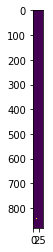

In [204]:
imshow(seq_categ[100])

In [210]:
results=model.predict(seq_categ)

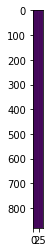

In [211]:
imshow(results[100])

In [154]:
#just trained the data for 2 epochs, I do not think the model is very good at all

In [214]:
np.corrcoef(seq_categ[100].flatten(),results[100].flatten())

array([[1.        , 0.94621961],
       [0.94621961, 1.        ]])

In [216]:
np.corrcoef(seq_categ[500].flatten(),results[500].flatten())

array([[1.        , 0.86787863],
       [0.86787863, 1.        ]])

In [181]:
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model

timesteps=880
input_dim=40
latent_dim=502

inputs = Input(shape=(timesteps, input_dim))
encoded = LSTM(latent_dim)(inputs)

decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(input_dim, return_sequences=True)(decoded)

sequence_autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)

In [182]:
seq_categ.shape

(1794, 880, 40)

In [229]:
padded_seq.shape

(1794, 880)

In [ ]:
padded_seq2=padded_seq

In [227]:
padded_seq2=padded_seq2.reshape(1794,880,1)

In [228]:
#what about without the one-hot encoding

model2 = Sequential()
model2.add(LSTM(100, activation='relu', input_shape=(880,1)))
model2.add(RepeatVector(880))
model2.add(LSTM(100, activation='relu', return_sequences=True))
model2.add(TimeDistributed(Dense(1)))
model2.compile(optimizer='adam', loss='mse')

model2.fit(padded_seq2, padded_seq2, epochs=2, verbose=0)

In [232]:
model2.layers[0:2].predict(padded_seq2[0:2])

AttributeError: 'list' object has no attribute 'predict'

In [233]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_55 (LSTM)               (None, 100)               40800     
_________________________________________________________________
repeat_vector_27 (RepeatVect (None, 880, 100)          0         
_________________________________________________________________
lstm_56 (LSTM)               (None, 880, 100)          80400     
_________________________________________________________________
time_distributed_21 (TimeDis (None, 880, 1)            101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [234]:
model2.predict(padded_seq2[0:2])

array([[[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]]], dtype=float32)

##let me try this tomorrow to assign weights

Using save_weights(), and load_weights() works.
You can also use model.get_layer( either by name or index) to get the layer and you can then call get_weights() or set_weights(). And do the mapping by matching names.

Alternatively when the structure of the network is known :
Usually when you build a network, you can return a tuple of model
(combined_network, subnetwork1, subnetwork2 ) which all share the same shared variables

If you need to transfer the weights you to another network or subnetwork for which you have a tuple.
(new_combined_network, new_subnetwork1, new_subnetwork2)

doing new_combined_network.set_weights( combined_network.get_weights() ) will set all the weights including the subnetworks.

doing new_subnetwork1.set_weights( subnetwork1.get_weights()) will only transfer the weight of the subnetwork1

model.layers[i].set_weights(listOfNumpyArrays)    
model.get_layer(layerName).set_weights(...)
model.set_weights(listOfNumpyArrays)